In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

Maximum speed:  372.83 m/s
At altitude:  27839.31672 m


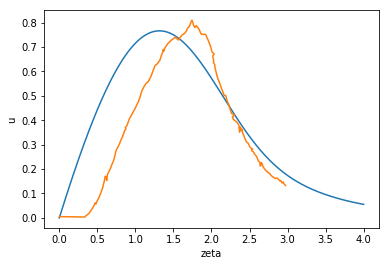

In [7]:
#1
felixdat = np.genfromtxt('FelixXVD.csv', delimiter=',')
y = 1000*felixdat[:, 0]
v = -felixdat[:, 1]

#plt.plot(y,v)
#plt.xlabel('altitude (m)')
#plt.ylabel('velocity (m/s)')
#plt.show()
max_v = felixdat[:,1].max()
print("Maximum speed: ", max_v, "m/s")
index_of_max = felixdat[:, 1].argmax()
print("At altitude: ", y[index_of_max], "m")

#2
y = y[4:np.size(y)]
v = v[4:np.size(v)]
Np = np.size(y)

#3
dfdy = ((v[2:Np]**2)-(v[0:Np-2]**2))/(y[2:Np]-y[0:Np-2])
#print(dfdy)

#4
y = y[1:Np-1]
v = v[1:Np-1]
Np = np.size(y)

#5
p_0 = 1.23 #kg/m**3
M = 0.029 #kg/mol
g = 9.8 #m/s**2
R = 8.3 #J/(mol*K)
m = 110 #kg (approximate mass of Felix)
T = 300 #K
y_atm = R*T/(M*g)
KA = []
KA_size = np.size(KA)
#print(KA_size)
while (KA_size < Np):
    KA.insert(KA_size, ((0.5*dfdy[KA_size]+g)*m)/((v[KA_size]**2)*np.exp(-1*y[KA_size]/y_atm)*p_0))
    #print(KA[KA_size])
    KA_size = np.size(KA)

#6  
KA = KA[50:np.size(KA)]
y = y[50:np.size(y)]
#plt.plot(y[0]-y, KA)
#plt.xlabel('distance fallen (m)')
#plt.ylabel('KA')
#plt.show()

#7
#mean_KA = np.mean(KA)
mean_KA = .11 #adjust KA to better fit the experimental data
#print(mean_KA)
Gamma = (2*y_atm*mean_KA*p_0*np.exp(-y[0]/y_atm))/m
#print(Gamma)
xi = np.linspace(0,4,400)
u = np.exp(-Gamma*np.exp(xi))*(special.expi(Gamma*np.exp(xi))-special.expi(Gamma))

plt.plot(xi,u)

xi2 = []
u2 = []
x=0
Np = np.size(y)
y[0] = 39000

while (x < Np):
    xi2.insert(x,(y[0]-y[x])/y_atm)
    u2.insert(x,v[x]**2/(2*g*y_atm))
    x = x+1
    
plt.plot(xi2,u2)

plt.xlabel('zeta')
plt.ylabel('u')
plt.show()